### 🧠 Mental Health Treatment Prediction

Given *data about the mental health of employees in the tech industry*, let's try to predict whether a given subject has **sought treatment** in the past.

We will use a Tensorflow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/osmi/mental-health-in-tech-survey

### Importing Libraries

In [4]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

In [6]:
data = pd.read_csv('archive/survey.csv')
data

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,NaN


### Cleaning

In [87]:
df = data.copy()

In [88]:
df.isna().mean()

Timestamp                    0.000000
Age                          0.000000
Gender                       0.000000
Country                      0.000000
state                        0.409055
self_employed                0.014297
family_history               0.000000
treatment                    0.000000
work_interfere               0.209690
no_employees                 0.000000
remote_work                  0.000000
tech_company                 0.000000
benefits                     0.000000
care_options                 0.000000
wellness_program             0.000000
seek_help                    0.000000
anonymity                    0.000000
leave                        0.000000
mental_health_consequence    0.000000
phys_health_consequence      0.000000
coworkers                    0.000000
supervisor                   0.000000
mental_health_interview      0.000000
phys_health_interview        0.000000
mental_vs_physical           0.000000
obs_consequence              0.000000
comments    

In [89]:
# Drop comments column
df = df.drop('comments', axis=1)

In [90]:
df.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                 18
family_history                 0
treatment                      0
work_interfere               264
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

In [91]:
df['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [92]:
df['self_employed'].mode()

0    No
Name: self_employed, dtype: object

In [93]:
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

In [94]:
df['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [95]:
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])

In [96]:
df.isna().sum()

Timestamp                      0
Age                            0
Gender                         0
Country                        0
state                        515
self_employed                  0
family_history                 0
treatment                      0
work_interfere                 0
no_employees                   0
remote_work                    0
tech_company                   0
benefits                       0
care_options                   0
wellness_program               0
seek_help                      0
anonymity                      0
leave                          0
mental_health_consequence      0
phys_health_consequence        0
coworkers                      0
supervisor                     0
mental_health_interview        0
phys_health_interview          0
mental_vs_physical             0
obs_consequence                0
dtype: int64

### Feature Engineering

In [97]:
df['Timestamp']

0       2014-08-27 11:29:31
1       2014-08-27 11:29:37
2       2014-08-27 11:29:44
3       2014-08-27 11:29:46
4       2014-08-27 11:30:22
               ...         
1254    2015-09-12 11:17:21
1255    2015-09-26 01:07:35
1256    2015-11-07 12:36:58
1257    2015-11-30 21:25:06
1258    2016-02-01 23:04:31
Name: Timestamp, Length: 1259, dtype: object

In [98]:
df['Year'] = df['Timestamp'].apply(lambda x: x[0:4]).astype(int)
df['Month'] = df['Timestamp'].apply(lambda x: x[5:7]).astype(int)
df['Day'] = df['Timestamp'].apply(lambda x: x[8:10]).astype(int)
df['Hour'] = df['Timestamp'].apply(lambda x: x[11:13]).astype(int)
df['Minute'] = df['Timestamp'].apply(lambda x: x[14:16]).astype(int)
df['Second'] = df['Timestamp'].apply(lambda x: x[17:19]).astype(int)
df = df.drop('Timestamp', axis=1)

In [99]:
df

,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,wellness_program,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Year,Month,Day,Hour,Minute,Second
0,37,Female,United States,IL,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,No,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,2014,8,27,11,29,31
1,44,M,United States,IN,No,No,No,Rarely,More than 1000,No,No,Don't know,No,Don't know,Don't know,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No,2014,8,27,11,29,37
2,32,Male,Canada,NaN,No,No,No,Rarely,6-25,No,Yes,No,No,No,No,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,2014,8,27,11,29,44
3,31,Male,United Kingdom,NaN,No,Yes,Yes,Often,26-100,No,Yes,No,Yes,No,No,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,2014,8,27,11,29,46
4,31,Male,United States,TX,No,No,No,Never,100-500,Yes,Yes,Yes,No,Don't know,Don't know,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,2014,8,27,11,30,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,male,United Kingdom,NaN,No,No,Yes,Sometimes,26-100,No,Yes,No,No,No,No,Don't know,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,2015,9,12,11,17,21
1255,32,Male,United States,IL,No,Yes,Yes,Often,26-100,Yes,Yes,Yes,Yes,No,No,Yes,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,2015,9,26,1,7,35
1256,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,No,Yes,Yes,Yes,No,No,Don't know,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,2015,11,7,12,36,58
1257,46,f,United States,NC,No,No,No,Sometimes,100-500,Yes,Yes,No,Yes,No,No,Don't know,Don't know,Yes,No,No,No,No,No,No,No,2015,11,30,21,25,6


### Encoding Features

In [100]:
{column: len(df[column].unique()) for column in df.select_dtypes('object').columns}

{'Gender': 49,
 'Country': 48,
 'state': 46,
 'self_employed': 2,
 'family_history': 2,
 'treatment': 2,
 'work_interfere': 4,
 'no_employees': 6,
 'remote_work': 2,
 'tech_company': 2,
 'benefits': 3,
 'care_options': 3,
 'wellness_program': 3,
 'seek_help': 3,
 'anonymity': 3,
 'leave': 5,
 'mental_health_consequence': 3,
 'phys_health_consequence': 3,
 'coworkers': 3,
 'supervisor': 3,
 'mental_health_interview': 3,
 'phys_health_interview': 3,
 'mental_vs_physical': 3,
 'obs_consequence': 2}

In [101]:
{column: df[column].unique() for column in df.select_dtypes('object').columns}

{'Gender': array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
        'Trans-female', 'Cis Female', 'F', 'something kinda male?',
        'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
        'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
        'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
        'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
        'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
        'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
        'Malr', 'p', 'femail', 'Cis Man',
        'ostensibly male, unsure what that really means'], dtype=object),
 'Country': array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
        'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
        'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
        'Austria', 'Ireland', 'India', 'South Africa', 'Italy'

In [102]:
def encode_gender(x):
    if x.lower()[0] == 'f':
        return 0
    elif x.lower()[0] == 'm':
        return 1
    else:
        return 2

In [103]:
df['Gender'] = df['Gender'].apply(encode_gender)

In [104]:
{column: df[column].unique() for column in df.select_dtypes('object').columns}

{'Country': array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
        'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
        'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
        'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
        'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
        'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
        'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
        'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
        'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
        'Czech Republic', 'Philippines'], dtype=object),
 'state': array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
        'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
        'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
        'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
        

In [105]:
binary_features = ['self_employed', 
                   'family_history', 
                   'remote_work', 
                   'tech_company', 
                   'obs_consequence'
                   ]

ordinal_features = [
    'no_employees', 
    'work_interfere']

nominal_features = [
    'Country', 
    'state', 
    'benefits', 
    'care_options', 
    'wellness_program', 
    'seek_help', 
    'anonymity', 
    'leave',
    'mental_health_consequence',
    'mental_health_interview',
    'phys_health_interview',
    'phys_health_consequence',
    'coworkers',
    'supervisor',
    'mental_vs_physical'
]

target = 'treatment'

In [106]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

def ordinal_encode(df, columns, orderings):
    df = df.copy()
    for column, ordering in zip(columns, orderings):
        df[column] = df[column].apply(lambda x: ordering.index(x))
    return df

def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix, dtype=int)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [107]:
binary_positive_values = ['Yes' for feature in binary_features]

ordinal_orderings = [
    ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000'],
    ['Never', 'Rarely', 'Sometimes', 'Often']
]

nominal_prefixes = [
    'C', 'S', 'B', 'CO', 'WP', 'SH', 'AN', 'L', 'MHC', 'MHI', 'PHI', 'PHC', 'CW', 'SP', 'MP'
]

In [108]:
df = binary_encode(df, binary_features, binary_positive_values)

In [109]:
df = ordinal_encode(df, ordinal_features, ordinal_orderings)

In [110]:
df = onehot_encode(df, nominal_features, nominal_prefixes)

In [111]:
df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,Year,Month,Day,Hour,Minute,Second,C_Australia,C_Austria,"C_Bahamas, The",C_Belgium,C_Bosnia and Herzegovina,C_Brazil,C_Bulgaria,C_Canada,C_China,C_Colombia,C_Costa Rica,C_Croatia,C_Czech Republic,C_Denmark,C_Finland,C_France,C_Georgia,C_Germany,C_Greece,C_Hungary,C_India,C_Ireland,C_Israel,C_Italy,C_Japan,C_Latvia,C_Mexico,C_Moldova,C_Netherlands,C_New Zealand,C_Nigeria,C_Norway,C_Philippines,C_Poland,C_Portugal,C_Romania,C_Russia,C_Singapore,C_Slovenia,C_South Africa,C_Spain,C_Sweden,C_Switzerland,C_Thailand,C_United Kingdom,C_United States,C_Uruguay,C_Zimbabwe,S_AL,S_AZ,S_CA,S_CO,S_CT,S_DC,S_FL,S_GA,S_IA,S_ID,S_IL,S_IN,S_KS,S_KY,S_LA,S_MA,S_MD,S_ME,S_MI,S_MN,S_MO,S_MS,S_NC,S_NE,S_NH,S_NJ,S_NM,S_NV,S_NY,S_OH,S_OK,S_OR,S_PA,S_RI,S_SC,S_SD,S_TN,S_TX,S_UT,S_VA,S_VT,S_WA,S_WI,S_WV,S_WY,B_Don't know,B_No,B_Yes,CO_No,CO_Not sure,CO_Yes,WP_Don't know,WP_No,WP_Yes,SH_Don't know,SH_No,SH_Yes,AN_Don't know,AN_No,AN_Yes,L_Don't know,L_Somewhat difficult,L_Somewhat easy,L_Very difficult,L_Very easy,MHC_Maybe,MHC_No,MHC_Yes,MHI_Maybe,MHI_No,MHI_Yes,PHI_Maybe,PHI_No,PHI_Yes,PHC_Maybe,PHC_No,PHC_Yes,CW_No,CW_Some of them,CW_Yes,SP_No,SP_Some of them,SP_Yes,MP_Don't know,MP_No,MP_Yes
0,37,0,0,0,Yes,3,1,0,1,0,2014,8,27,11,29,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,44,1,0,0,No,1,5,0,0,0,2014,8,27,11,29,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,32,1,0,0,No,1,1,0,1,0,2014,8,27,11,29,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
3,31,1,0,1,Yes,3,2,0,1,1,2014,8,27,11,29,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
4,31,1,0,0,No,0,3,1,1,0,2014,8,27,11,30,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,Yes,2,2,0,1,0,2015,9,12,11,17,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1255,32,1,0,1,Yes,3,2,1,1,0,2015,9,26,1,7,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [112]:
df.select_dtypes('object')

,treatment
0,Yes
1,No
2,No
3,Yes
4,No
...,...
1254,Yes
1255,Yes
1256,Yes
1257,No


### Encoding Labels

In [114]:
df = binary_encode(
    df,
    columns= ['treatment'],
    positive_values = ['Yes']
)

In [115]:

df

,Age,Gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,obs_consequence,Year,Month,Day,Hour,Minute,Second,C_Australia,C_Austria,"C_Bahamas, The",C_Belgium,C_Bosnia and Herzegovina,C_Brazil,C_Bulgaria,C_Canada,C_China,C_Colombia,C_Costa Rica,C_Croatia,C_Czech Republic,C_Denmark,C_Finland,C_France,C_Georgia,C_Germany,C_Greece,C_Hungary,C_India,C_Ireland,C_Israel,C_Italy,C_Japan,C_Latvia,C_Mexico,C_Moldova,C_Netherlands,C_New Zealand,C_Nigeria,C_Norway,C_Philippines,C_Poland,C_Portugal,C_Romania,C_Russia,C_Singapore,C_Slovenia,C_South Africa,C_Spain,C_Sweden,C_Switzerland,C_Thailand,C_United Kingdom,C_United States,C_Uruguay,C_Zimbabwe,S_AL,S_AZ,S_CA,S_CO,S_CT,S_DC,S_FL,S_GA,S_IA,S_ID,S_IL,S_IN,S_KS,S_KY,S_LA,S_MA,S_MD,S_ME,S_MI,S_MN,S_MO,S_MS,S_NC,S_NE,S_NH,S_NJ,S_NM,S_NV,S_NY,S_OH,S_OK,S_OR,S_PA,S_RI,S_SC,S_SD,S_TN,S_TX,S_UT,S_VA,S_VT,S_WA,S_WI,S_WV,S_WY,B_Don't know,B_No,B_Yes,CO_No,CO_Not sure,CO_Yes,WP_Don't know,WP_No,WP_Yes,SH_Don't know,SH_No,SH_Yes,AN_Don't know,AN_No,AN_Yes,L_Don't know,L_Somewhat difficult,L_Somewhat easy,L_Very difficult,L_Very easy,MHC_Maybe,MHC_No,MHC_Yes,MHI_Maybe,MHI_No,MHI_Yes,PHI_Maybe,PHI_No,PHI_Yes,PHC_Maybe,PHC_No,PHC_Yes,CW_No,CW_Some of them,CW_Yes,SP_No,SP_Some of them,SP_Yes,MP_Don't know,MP_No,MP_Yes
0,37,0,0,0,1,3,1,0,1,0,2014,8,27,11,29,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1
1,44,1,0,0,0,1,5,0,0,0,2014,8,27,11,29,37,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0
2,32,1,0,0,0,1,1,0,1,0,2014,8,27,11,29,44,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0
3,31,1,0,1,1,3,2,0,1,1,2014,8,27,11,29,46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0
4,31,1,0,0,0,0,3,1,1,0,2014,8,27,11,30,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,26,1,0,0,1,2,2,0,1,0,2015,9,12,11,17,21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0
1255,32,1,0,1,1,3,2,1,1,0,2015,9,26,1,7,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [116]:
print("Remaining non-numeric columns: ", len(df.select_dtypes('object').columns))

Remaining non-numeric columns:  0


In [117]:
print("Remaining missing values: ", df.isna().sum().sum())

Remaining missing values:  0


### Split and Scale Data

In [118]:
y = df['treatment'].copy()
X = df.drop('treatment', axis=1).copy()

In [119]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [120]:
X

,Age,Gender,self_employed,family_history,work_interfere,no_employees,remote_work,tech_company,obs_consequence,Year,Month,Day,Hour,Minute,Second,C_Australia,C_Austria,"C_Bahamas, The",C_Belgium,C_Bosnia and Herzegovina,C_Brazil,C_Bulgaria,C_Canada,C_China,C_Colombia,C_Costa Rica,C_Croatia,C_Czech Republic,C_Denmark,C_Finland,C_France,C_Georgia,C_Germany,C_Greece,C_Hungary,C_India,C_Ireland,C_Israel,C_Italy,C_Japan,C_Latvia,C_Mexico,C_Moldova,C_Netherlands,C_New Zealand,C_Nigeria,C_Norway,C_Philippines,C_Poland,C_Portugal,C_Romania,C_Russia,C_Singapore,C_Slovenia,C_South Africa,C_Spain,C_Sweden,C_Switzerland,C_Thailand,C_United Kingdom,C_United States,C_Uruguay,C_Zimbabwe,S_AL,S_AZ,S_CA,S_CO,S_CT,S_DC,S_FL,S_GA,S_IA,S_ID,S_IL,S_IN,S_KS,S_KY,S_LA,S_MA,S_MD,S_ME,S_MI,S_MN,S_MO,S_MS,S_NC,S_NE,S_NH,S_NJ,S_NM,S_NV,S_NY,S_OH,S_OK,S_OR,S_PA,S_RI,S_SC,S_SD,S_TN,S_TX,S_UT,S_VA,S_VT,S_WA,S_WI,S_WV,S_WY,B_Don't know,B_No,B_Yes,CO_No,CO_Not sure,CO_Yes,WP_Don't know,WP_No,WP_Yes,SH_Don't know,SH_No,SH_Yes,AN_Don't know,AN_No,AN_Yes,L_Don't know,L_Somewhat difficult,L_Somewhat easy,L_Very difficult,L_Very easy,MHC_Maybe,MHC_No,MHC_Yes,MHI_Maybe,MHI_No,MHI_Yes,PHI_Maybe,PHI_No,PHI_Yes,PHC_Maybe,PHC_No,PHC_Yes,CW_No,CW_Some of them,CW_Yes,SP_No,SP_Some of them,SP_Yes,MP_Don't know,MP_No,MP_Yes
0,-0.028194,-1.921411,-0.362184,-0.800912,1.524085,-0.831276,-0.65255,0.470260,-0.413718,-0.239049,0.161574,0.141116,-0.401785,-0.080142,0.049235,-0.130241,-0.048873,-0.028194,-0.069199,-0.028194,-0.069199,-0.056456,-0.246287,-0.028194,-0.039888,-0.028194,-0.039888,-0.028194,-0.039888,-0.048873,-0.102144,-0.028194,-0.192529,-0.039888,-0.028194,-0.089479,-0.148039,-0.063145,-0.074773,-0.028194,-0.028194,-0.048873,-0.028194,-0.148039,-0.079968,-0.028194,-0.028194,-0.028194,-0.074773,-0.039888,-0.028194,-0.048873,-0.056456,-0.028194,-0.069199,-0.028194,-0.074773,-0.074773,-0.028194,-0.415034,0.822455,-0.028194,-0.028194,-0.079968,-0.074773,-0.350862,-0.084853,-0.056456,-0.056456,-0.109808,-0.098097,-0.056456,-0.028194,6.512587,-0.148039,-0.048873,-0.063145,-0.028194,-0.127051,-0.079968,-0.028194,-0.13336,-0.130241,-0.098097,-0.028194,-0.106042,-0.039888,-0.048873,-0.069199,-0.039888,-0.048873,-0.217764,-0.156237,-0.069199,-0.153549,-0.153549,-0.028194,-0.063145,-0.048873,-0.192529,-0.190300,-0.093883,-0.106042,-0.048873,-0.242638,-0.098097,-0.028194,-0.039888,-0.692413,-0.650076,1.280396,-0.812988,1.734807,-0.738096,-0.418971,0.70374,-0.471519,-0.636501,-1.026564,2.008980,-1.364318,-0.233321,1.535361,-0.899393,-0.333480,1.932119,-0.290534,-0.442303,-0.781009,1.252752,-0.549513,-0.443585,0.499007,-0.190300,1.122641,-0.811641,-0.437158,-0.52619,0.60090,-0.225651,-0.510157,0.79159,-0.466478,-0.673655,-0.620515,1.199968,-0.918334,-0.608249,1.634183
1,-0.028194,0.400140,-0.362184,-0.800912,-0.714915,1.511368,-0.65255,-2.126483,-0.413718,-0.239049,0.161574,0.141116,-0.401785,-0.080142,0.400771,-0.130241,-0.048873,-0.028194,-0.069199,-0.028194,-0.069199,-0.056456,-0.246287,-0.028194,-0.039888,-0.028194,-0.039888,-0.028194,-0.039888,-0.048873,-0.102144,-0.028194,-0.192529,-0.039888,-0.028194,-0.089479,-0.148039,-0.063145,-0.074773,-0.028194,-0.028194,-0.048873,-0.028194,-0.148039,-0.079968,-0.028194,-0.028194,-0.028194,-0.074773,-0.039888,-0.028194,-0.048873,-0.056456,-0.028194,-0.069199,-0.028194,-0.074773,-0.074773,-0.028194,-0.415034,0.822455,-0.028194,-0.028194,-0.079968,-0.074773,-0.350862,-0.084853,-0.056456,-0.056456,-0.109808,-0.098097,-0.056456,-0.028194,-0.153549,6.754971,-0.048873,-0.063145,-0.028194,-0.127051,-0.079968,-0.028194,-0.13336,-0.130241,-0.098097,-0.028194,-0.106042,-0.039888,-0.048873,-0.069199,-0.039888,-0.048873,-0.217764,-0.156237,-0.069199,-0.153549,-0.153549,-0.028194,-0.063145,-0.048873,-0.192529,-0.190300,-0.093883,-0.106042,-0.048873,-0.242638,-0.098097,-0.028194,-0.039888,1.444224,-0.650076,-0.781009,1.230030,-0.576433,-0.738096,2.386799,-1.42098,-0.471519,1.571089,-1.026564,-0.497765,0.732967,-0.233321,-0.651313,1.111861,-0.333480,

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=100)

### Training

In [122]:
X.shape

(1259, 149)

In [127]:
print("Class distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean()*100, (1 - y_train.mean())*100))

Class distribution (Positive to Negative): 49.7% / 50.3%


In [128]:
inputs = tf.keras.Input(shape=(X.shape[1], ))
x = tf.keras.layers.Dense(1024, activation='relu')(inputs)
x = tf.keras.layers.Dense(1, activation='sigmoid')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

batch_size = 64
epochs = 50

history = model.fit(
    X_train,
    y_train,
    validation_split = 0.2,
    batch_size = batch_size,
    epochs = epochs,
    callbacks = [
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5099 - auc: 0.6945 - loss: 0.6798 - val_accuracy: 0.4576 - val_auc: 0.6909 - val_loss: 0.6860 - learning_rate: 0.0010
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5668 - auc: 0.8365 - loss: 0.6496 - val_accuracy: 0.5593 - val_auc: 0.6977 - val_loss: 0.6822 - learning_rate: 0.0010
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6605 - auc: 0.8707 - loss: 0.6360 - val_accuracy: 0.5819 - val_auc: 0.6939 - val_loss: 0.6815 - learning_rate: 0.0010
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7287 - auc: 0.8962 - loss: 0.6258 - val_accuracy: 0.5932 - val_auc: 0.6726 - val_loss: 0.6820 - learning_rate: 0.0010
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7429 - auc: 0.9118 - loss: 0.6174 - val_accuracy: 0.5876 - val_auc: 0.6620 - val_loss: 0.6828 - learning_rate: 0.0010
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7798 - auc: 0.9197 -

### Results

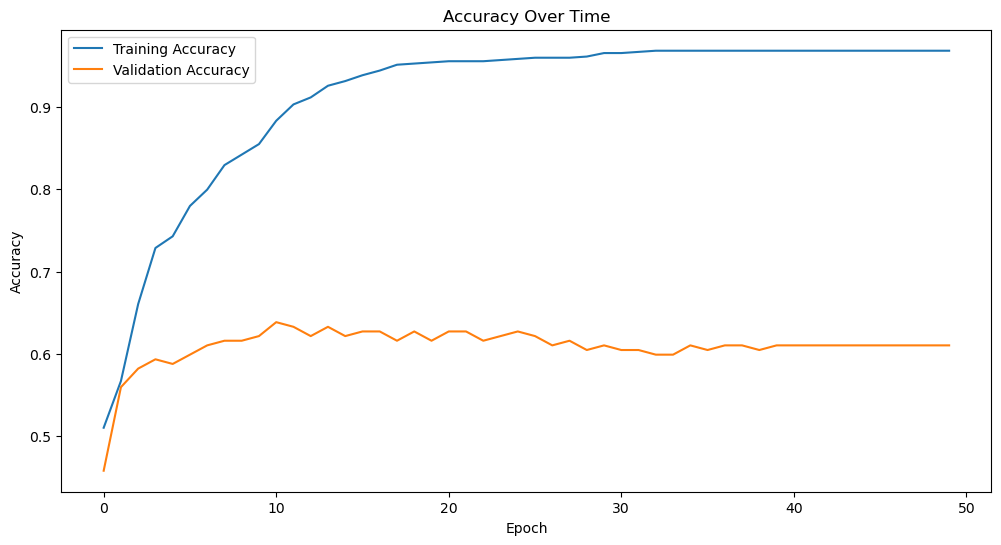

In [129]:
plt.figure(figsize=(12, 6))

plt.plot(range(epochs), history.history['accuracy'], label = "Training Accuracy")
plt.plot(range(epochs), history.history['val_accuracy'], label = "Validation Accuracy")

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()
plt.title('Accuracy Over Time')

plt.show()

In [130]:
model.evaluate(X_test, y_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7090 - auc: 0.7482 - loss: 0.6095 


[0.6095033884048462, 0.7089946866035461, 0.7482103705406189]